In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

vgdata = pd.read_csv('clean_videogamesales.csv')
vgdata.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,33.088,23.168,3.016,6.760,66.024,7.6,8,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.544,10.208,3.032,2.632,28.416,8.2,8.3,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,12.488,8.744,2.624,2.360,26.216,8.0,8,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,9.024,7.312,5.200,2.304,23.840,8.9,8.5,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,11.168,7.344,2.344,2.272,23.136,5.8,6.6,E


In [67]:
vgdata2 = vgdata.copy()

In [68]:
plat_counts = vgdata2['Platform'].value_counts()
plat_counts

PS2     1275
X360     887
PS3      798
DS       703
XB       702
PC       654
Wii      565
PSP      455
GC       437
GBA      426
PS4      241
PS       185
3DS      165
XOne     161
PSV      119
WiiU      90
DC        14
Name: Platform, dtype: int64

In [69]:
# This is one way to encode string values into numeric values
plat_dict = {'PS2': 0, 'X360': 1, 'PS3':2, 'DS': 4, 'XB': 5, 'PC': 6, 'Wii': 7, 'PSP': 8, 'GC': 9, 'GBA': 10, 'PS4': 11, 'PS': 12, '3DS': 13, 'XOne': 14, 'PSV': 15, 'WiiU': 16, 'DC': 17}
vgdata2 = vgdata2.replace({'Platform': plat_dict})

In [70]:
gen_counts = vgdata2['Genre'].value_counts()
gen_counts

Action          1832
Sports          1148
Shooter          919
Role-Playing     728
Racing           713
Misc             504
Platform         489
Fighting         403
Simulation       342
Adventure        299
Strategy         284
Puzzle           216
Name: Genre, dtype: int64

In [71]:
# This is one way to encode string values into numeric values
gen_dict = {'Action': 0, 'Sports': 1, 'Shooter':2, 'Role-Playing': 3, 'Racing': 4, 'Misc': 5, 'Platform': 6, 'Fighting': 7, 'Simulation': 8, 'Adventure': 9, 'Strategy': 10, 'Puzzle': 11}
vgdata2 = vgdata2.replace({'Genre': gen_dict})

In [72]:
rat_counts = vgdata2['Rating'].value_counts()
rat_counts

E       2738
T       2583
M       1457
E10+    1096
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64

In [73]:
# This is one way to encode string values into numeric values
rat_dict = {'E': 0, 'T': 1, 'M':2, 'E10+': 3, 'AO': 4, 'K-A': 5, 'RP': 6}
vgdata2 = vgdata2.replace({'Rating': rat_dict})

In [74]:
vgdata2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,7,2006.0,1,Nintendo,33.088,23.168,3.016,6.760,66.024,7.6,8,0
1,Mario Kart Wii,7,2008.0,4,Nintendo,12.544,10.208,3.032,2.632,28.416,8.2,8.3,0
2,Wii Sports Resort,7,2009.0,1,Nintendo,12.488,8.744,2.624,2.360,26.216,8.0,8,0
3,New Super Mario Bros.,4,2006.0,6,Nintendo,9.024,7.312,5.200,2.304,23.840,8.9,8.5,0
4,Wii Play,7,2006.0,5,Nintendo,11.168,7.344,2.344,2.272,23.136,5.8,6.6,0


In [75]:
pub_counts = vgdata2['Publisher'].value_counts()
pub_counts

Electronic Arts                1012
Activision                      562
Ubisoft                         554
THQ                             401
Sony Computer Entertainment     348
                               ... 
inXile Entertainment              1
HMH Interactive                   1
Ackkstudios                       1
Aqua Plus                         1
NewKidCo                          1
Name: Publisher, Length: 292, dtype: int64

<AxesSubplot:ylabel='Density'>

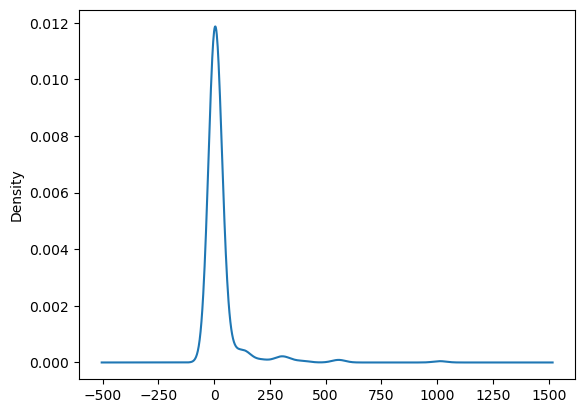

In [76]:
pub_counts.plot.density()

In [77]:
# Determine which values to replace if counts are less than ...?
replace_publisher = list(pub_counts[pub_counts < 5].index)

# Replace in dataframe
for pub in replace_publisher:
    vgdata2.Publisher = vgdata2.Publisher.replace(pub,"Other")
    
# Check to make sure binning was successful
vgdata2.Publisher.value_counts()

Electronic Arts             1012
Activision                   562
Ubisoft                      554
THQ                          401
Other                        353
                            ... 
Natsume                        5
Koch Media                     5
Tomy Corporation               5
NCSoft                         5
Conspiracy Entertainment       5
Name: Publisher, Length: 104, dtype: int64

In [78]:
vgdata2['Publisher'] = le.fit_transform(vgdata2['Publisher'])
vgdata2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,Wii Sports,7,2006.0,1,60,33.088,23.168,3.016,6.760,66.024,7.6,8,0
1,Mario Kart Wii,7,2008.0,4,60,12.544,10.208,3.032,2.632,28.416,8.2,8.3,0
2,Wii Sports Resort,7,2009.0,1,60,12.488,8.744,2.624,2.360,26.216,8.0,8,0
3,New Super Mario Bros.,4,2006.0,6,60,9.024,7.312,5.200,2.304,23.840,8.9,8.5,0
4,Wii Play,7,2006.0,5,60,11.168,7.344,2.344,2.272,23.136,5.8,6.6,0


In [79]:
vgdata2 = vgdata2.drop(['Name'], axis = 1)

In [80]:
vgdata2.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,7,2006.0,1,60,33.088,23.168,3.016,6.760,66.024,7.6,8,0
1,7,2008.0,4,60,12.544,10.208,3.032,2.632,28.416,8.2,8.3,0
2,7,2009.0,1,60,12.488,8.744,2.624,2.360,26.216,8.0,8,0
3,4,2006.0,6,60,9.024,7.312,5.200,2.304,23.840,8.9,8.5,0
4,7,2006.0,5,60,11.168,7.344,2.344,2.272,23.136,5.8,6.6,0


In [81]:
vgdata2.to_csv('regreadyvgsales2.csv', index = False, encoding = 'UTF8')